In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import googleapiclient.discovery
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Code to scrape Youtube comments
api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "Add_your_youtube_api" # Dont share your YouTube api to anyone

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

request = youtube.commentThreads().list(
    part="snippet",
    videoId="Add_YouTube_video_link",
    maxResults=150
)
response = request.execute()

comments = []

for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['updatedAt'],
        comment['likeCount'],
        comment['textDisplay']
    ])

df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

df.head(150)

In [4]:
df.head()

,author,published_at,updated_at,like_count,text
0,@SaiAbhyankkar,2024-01-23T20:14:42Z,2024-01-23T20:14:42Z,52722,Hello makkale ! This is Sai Abhyankkar ! It’s ...
1,@vithushanathileeban3184,2024-03-06T05:24:01Z,2024-03-06T05:24:01Z,0,Song super awesome visual wrost u very bad kon...
2,@XIAO_PLAYS,2024-03-06T05:21:37Z,2024-03-06T05:21:37Z,0,Armpit cleaner ad
3,@jinapriyawadyanatha1839,2024-03-06T04:57:22Z,2024-03-06T04:57:22Z,0,So beautiful and perfect song bro ❤love you❤go...
4,@Sanmugacatering,2024-03-06T04:16:18Z,2024-03-06T04:16:18Z,0,"Bro antha <a href=""https://www.youtube.com/wat..."


In [5]:
df.tail()

,author,published_at,updated_at,like_count,text
95,@sharmilamanian2088,2024-03-05T10:28:01Z,2024-03-05T10:28:01Z,1,I am addicted to this song. ❤❤
96,@ThebrandzNish,2024-03-05T10:03:56Z,2024-03-05T10:03:56Z,1,"<a href=""https://www.youtube.com/watch?v=VU23O..."
97,@deepadeepa.s988,2024-03-05T09:57:43Z,2024-03-05T09:57:43Z,0,What a gracefull voice ❤ i am your huge fan o...
98,@shanmugamS-oo1zp,2024-03-05T09:36:26Z,2024-03-05T09:36:26Z,2,"<a href=""https://www.youtube.com/watch?v=VU23O..."
99,@user-gq2yj7ej1b,2024-03-05T09:34:14Z,2024-03-05T09:34:14Z,0,Nice


In [6]:
df.isna().sum()

author          0
published_at    0
updated_at      0
like_count      0
text            0
dtype: int64

In [7]:
df.drop(['author','published_at','updated_at','like_count'],axis=1,inplace=True)
df

,text
0,Hello makkale ! This is Sai Abhyankkar ! It’s ...
1,Song super awesome visual wrost u very bad kon...
2,Armpit cleaner ad
3,So beautiful and perfect song bro ❤love you❤go...
4,"Bro antha <a href=""https://www.youtube.com/wat..."
...,...
95,I am addicted to this song. ❤❤
96,"<a href=""https://www.youtube.com/watch?v=VU23O..."
97,What a gracefull voice ❤ i am your huge fan o...
98,"<a href=""https://www.youtube.com/watch?v=VU23O..."


In [8]:
nltk.download('stopwords')
nltk.download('punkt') # It is used for tokenization
nltk.download('wordnet') # It is used for lematization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
comment=df.text
df

,text
0,Hello makkale ! This is Sai Abhyankkar ! It’s ...
1,Song super awesome visual wrost u very bad kon...
2,Armpit cleaner ad
3,So beautiful and perfect song bro ❤love you❤go...
4,"Bro antha <a href=""https://www.youtube.com/wat..."
...,...
95,I am addicted to this song. ❤❤
96,"<a href=""https://www.youtube.com/watch?v=VU23O..."
97,What a gracefull voice ❤ i am your huge fan o...
98,"<a href=""https://www.youtube.com/watch?v=VU23O..."


In [10]:
from nltk import TweetTokenizer #WordTokenizer
tk=TweetTokenizer()
comment=comment.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
comment

0     Hello makkale ! This is Sai Abhyankkar ! It ’ ...
1     Song super awesome visual wrost u very bad kon...
2                                     Armpit cleaner ad
3     So beautiful and perfect song bro ❤ love you ❤...
4     Bro antha < a href = " https://www.youtube.com...
                            ...                        
95                     I am addicted to this song . ❤ ❤
96    < a href = " https://www.youtube.com/watch?v=V...
97    What a gracefull voice ❤ i am your huge fan of...
98    < a href = " https://www.youtube.com/watch?v=V...
99                                                 Nice
Name: text, Length: 100, dtype: object

In [11]:
#Regular Expressinon (It is used for removing special charactors)
import re
comment=comment.str.replace('[^a-zA-Z0-9]+',' ')
comment

<ipython-input-11-3ef4769c5915>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  comment=comment.str.replace('[^a-zA-Z0-9]+',' ')


0     Hello makkale This is Sai Abhyankkar It s extr...
1     Song super awesome visual wrost u very bad kon...
2                                     Armpit cleaner ad
3     So beautiful and perfect song bro love you goo...
4     Bro antha a href https www youtube com watch v...
                            ...                        
95                          I am addicted to this song 
96     a href https www youtube com watch v VU23OPQ1...
97    What a gracefull voice i am your huge fan of y...
98     a href https www youtube com watch v VU23OPQ1...
99                                                 Nice
Name: text, Length: 100, dtype: object

In [12]:
from nltk.tokenize import word_tokenize
comment=comment.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))

In [13]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
comment=comment.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
comment

0     hello makkal this sai abhyankkar extrem heartw...
1     song super awesom visual wrost veri bad konjam...
2                                        armpit cleaner
3        beauti and perfect song bro love you good luck
4     bro antha href https www youtub com watch vu23...
                            ...                        
95                                     addict this song
96      href https www youtub com watch vu23opq1pmc 136
97    what graceful voic your huge fan your voic and...
98    href https www youtub com watch vu23opq1pmc hr...
99                                                 nice
Name: text, Length: 100, dtype: object

In [14]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
comment=comment.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
comment

0     hello makkal sai abhyankkar extrem heartwarm s...
1     song super awesom visual wrost veri bad konjam...
2                                        armpit cleaner
3                beauti perfect song bro love good luck
4     bro antha href https www youtub com watch vu23...
                            ...                        
95                                          addict song
96      href https www youtub com watch vu23opq1pmc 136
97                          graceful voic huge fan voic
98    href https www youtub com watch vu23opq1pmc hr...
99                                                 nice
Name: text, Length: 100, dtype: object

In [15]:
#Vectorisation - converting words into numbers
#Tfidf - Tearm frequency inverse documrnt frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(comment)
data

<100x342 sparse matrix of type '<class 'numpy.float64'>'
	with 518 stored elements in Compressed Sparse Row format>

In [16]:
data.shape

(100, 342)

In [17]:
from textblob import TextBlob

def get_sentiment(data):
    analysis = TextBlob(data)
    # Polarity ranges from -1 (negative) to 1 (positive)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [18]:
sentiments = []
for i, comment in enumerate(comment):
    sentiment = get_sentiment(comment)
    sentiments.append({"Comment": comment, "Sentiment": sentiment})

# Print sentiments
for sentiment in sentiments:
    print(sentiment)

{'Comment': 'hello makkal sai abhyankkar extrem heartwarm see respons keep love support flow love romba nandri makkaleyi gig', 'Sentiment': 'positive'}
{'Comment': 'song super awesom visual wrost veri bad konjam kooda match ila', 'Sentiment': 'negative'}
{'Comment': 'armpit cleaner', 'Sentiment': 'neutral'}
{'Comment': 'beauti perfect song bro love good luck', 'Sentiment': 'positive'}
{'Comment': 'bro antha href https www youtub com watch vu23opq1pmc 135 step semma vibe bro', 'Sentiment': 'neutral'}
{'Comment': 'addict song', 'Sentiment': 'neutral'}
{'Comment': '', 'Sentiment': 'neutral'}
{'Comment': 'music top notch addit femal lead samyukta vishwanatha movement way reflect choreograph anusha vishwanathan choreographi piller song samyukta presenc push want watch', 'Sentiment': 'positive'}
{'Comment': 'absolut addict semmmmaaaa folki groovi', 'Sentiment': 'neutral'}
{'Comment': '', 'Sentiment': 'neutral'}
{'Comment': 'neenga harini mam son', 'Sentiment': 'neutral'}
{'Comment': '', 'Sen

In [19]:
columns = ["Comment", "Sentiment"]
result = pd.DataFrame(sentiments, columns=columns)
result

,Comment,Sentiment
0,hello makkal sai abhyankkar extrem heartwarm s...,positive
1,song super awesom visual wrost veri bad konjam...,negative
2,armpit cleaner,neutral
3,beauti perfect song bro love good luck,positive
4,bro antha href https www youtub com watch vu23...,neutral
...,...,...
95,addict song,neutral
96,href https www youtub com watch vu23opq1pmc 136,neutral
97,graceful voic huge fan voic,positive
98,href https www youtub com watch vu23opq1pmc hr...,neutral


In [20]:
result.head()

,Comment,Sentiment
0,hello makkal sai abhyankkar extrem heartwarm s...,positive
1,song super awesom visual wrost veri bad konjam...,negative
2,armpit cleaner,neutral
3,beauti perfect song bro love good luck,positive
4,bro antha href https www youtub com watch vu23...,neutral


In [21]:
result.tail()

,Comment,Sentiment
95,addict song,neutral
96,href https www youtub com watch vu23opq1pmc 136,neutral
97,graceful voic huge fan voic,positive
98,href https www youtub com watch vu23opq1pmc hr...,neutral
99,nice,positive


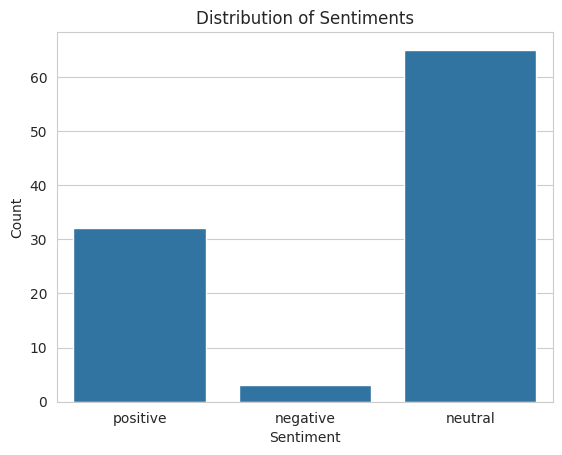

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.countplot(x="Sentiment", data=result)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiments")
plt.show()

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = result['Sentiment'].value_counts()

# Convert the series to a DataFrame
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Sentiment', 'count']

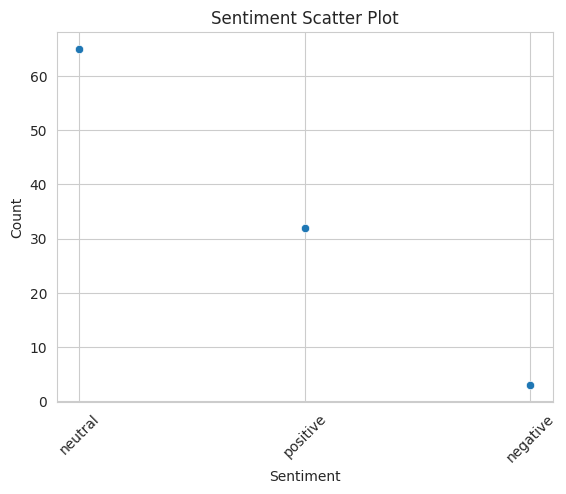

In [50]:
# Count the occurrences of each sentiment
sentiment_counts = result['Sentiment'].value_counts()

# Convert the series to a DataFrame
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Sentiment', 'count']

# Plot the scatter plot
sns.set_style("whitegrid")
sns.scatterplot(x='Sentiment', y='count', data=sentiment_counts_df)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Scatter Plot")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


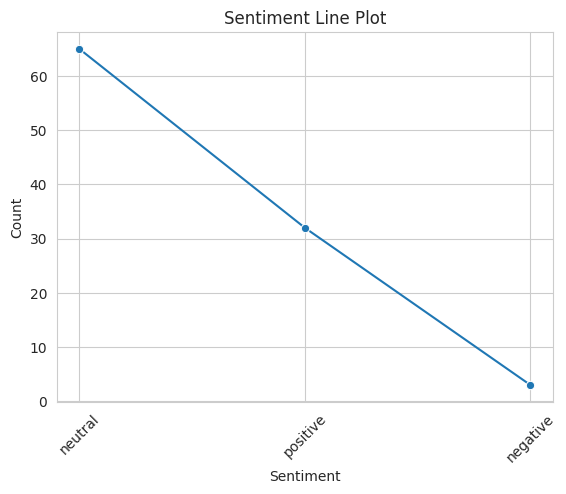

In [51]:
# Plot the line plot
sns.set_style("whitegrid")
sns.lineplot(x='Sentiment', y='count', data=sentiment_counts_df, marker='o')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Line Plot")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


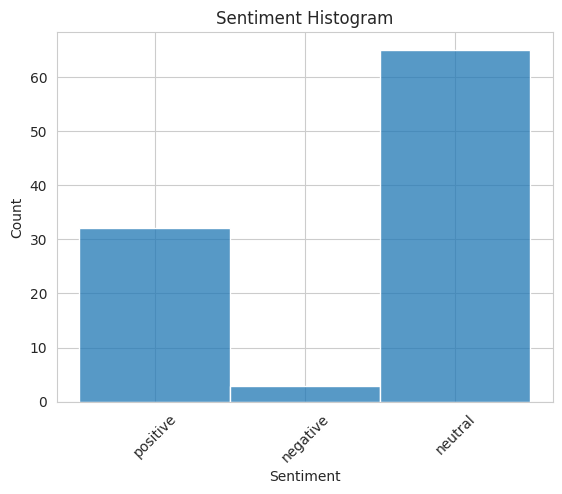

In [65]:
#Histogram
sns.set_style("whitegrid")
sns.histplot(data=df, x='Sentiment', discrete=True)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Histogram")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

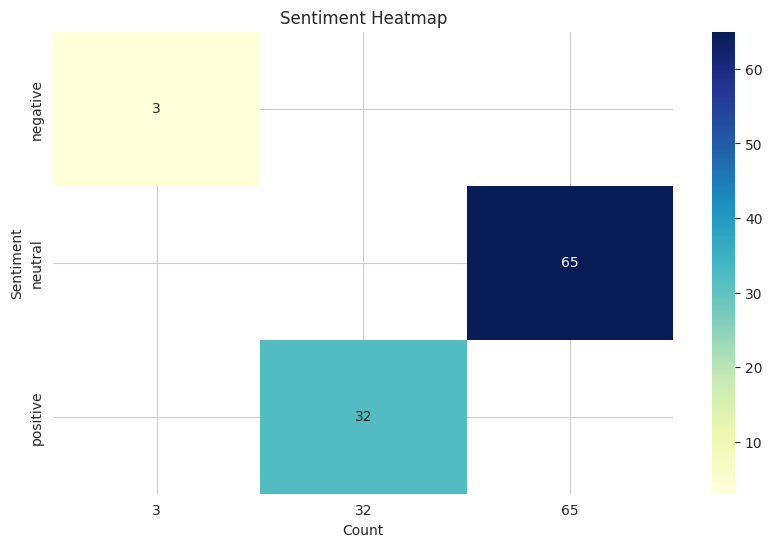

In [68]:
# Pivot the DataFrame to have sentiment as rows and count as columns
pivot_df = sentiment_counts_df.pivot(index='Sentiment', columns='count', values='count')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu")
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.title("Sentiment Heatmap")
plt.show()